<a href="https://colab.research.google.com/github/MK316/Class_Spring2022/blob/main/EPA/Yes_noQuestion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grammar: Convert a statement to a yes-no question. (Be-verb containing sentence only)

Audio is the output.

# [1] svgling application to draw tree diagram

install {svgling}

In [60]:
%%capture
!pip install svgling

import svgling
from svgling.figure import Caption, SideBySide, RowByRow

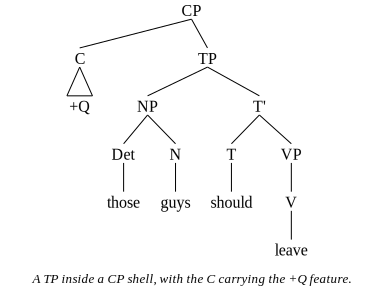

In [94]:
#@markdown Tree structure with binary branching
# t1 = '"T",("T","should"),("VP","leave")'
# mystr0 = (t1)
mystr0 = ("CP", ("C", "+Q"), ("TP",("NP",("Det","those"),("N","guys")),("T'",("T","should"),("VP",("V","leave")))))
out = svgling.draw_tree(mystr0)
out.set_edge_style((0,0), svgling.core.TriangleEdge())
# out.set_edge_style((1,1,0), svgling.core.TriangleEdge())
Caption(out,"A TP inside a CP shell, with the C carrying the +Q feature.")

# [2] Statement to Yes-no question with some restrictions 

1. The statement you're entering must contain a be-verb.
2. If you use a proper noun as a subject, restrict it to one of the followings: 

> **Male: Tom, Thomas, Bill**

> **Female: Mary, Jane, Jessica**

2. Must contain a punctuation(.)

In [27]:
#@markdown Install and import libraries
%%capture
!pip install gtts
!pip install IPython
from gtts import gTTS
from IPython.display import Audio, display

#@markdown Define etts(), ktts(): E-audio.mp3, K-audio.mp3
def etts(text):
  text_to_say = text

  gtts_object = gTTS(text = text_to_say,
                     lang = "en",
                    slow = False)
  
  gtts_object.save("E-audio.mp3")
  return Audio("E-audio.mp3")

def ktts(text):
  text_to_say = text

  gtts_object = gTTS(text = text_to_say,
                     lang = "ko",
                    slow = False)
  
  gtts_object.save("K-audio.mp3")
  return Audio("K-audio.mp3")

In [57]:
#@markdown Statment to a Yes-No question (Audio autoplay)
sentence = input("Type a sentence containing a be verb: e.g., I am a students.")
beverbs = ["is", "was", "are", "were"]
pronouns = ["I","You","He","She","They","It"]
names = ["Mary", "Jane", "Tom","Thomas","Jessica", "Bill"]

def check_word(list_A, list_B):
    for a in list_A:
        for b in list_B:
            if b in a:
                mword = a
                return True, mword
    return False, None


cat1 = sentence.split()

result = check_word(cat1,beverbs)

if result[0] == True:
  if cat1[0] in pronouns:
      b = result[1]
      be = " "+b+" "
      ss = sentence.split(be)
      subj = ss[0]
      nsubj = subj[0].lower()+subj[1:]
      pred = ss[1]
      w1 = b[0].upper() + b[1:] # Capitalized be verb
      newsent = w1 + " " + nsubj + " " + pred[:-1] + "?"
      mytext = "I'll make it to a yes-no question: " + newsent
      print(newsent)
  elif cat1[0] not in pronouns and cat1[0] in names:
        b = result[1]
        be = " "+b+" "
        ss = sentence.split(be)
        subj = ss[0]
        pred = ss[1]
        w1 = b[0].upper() + b[1:] # Capitalized be verb
        newsent = w1 + " " + subj + " " + pred[:-1] + "?"
        mytext = "I'll make it to a yes-no question: " + newsent
        print(newsent)
  elif cat1[0] not in pronouns and cat1[0] not in names:
        b = result[1]
        be = " "+b+" "
        ss = sentence.split(be)
        subj = ss[0]
        nsubj = subj[0].lower()+subj[1:]
        pred = ss[1]
        w1 = b[0].upper() + b[1:] # Capitalized be verb
        newsent = w1 + " " + nsubj + " " + pred[:-1] + "?"
        mytext = "I'll make it to a yes-no question: " + newsent
        print(newsent)

else:
    mytext = "The sentence you\' provided does not contain a 'Be' verb. Try again."
    print("Type a sentence that contains a be verb.")

etts(mytext)
Audio("E-audio.mp3",autoplay=True)

Type a sentence containing a be verb: e.g., I am a students.You were tired yesterday.
Were you tired yesterday?
